In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from mpl_toolkits.basemap import Basemap
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [2]:
# Create basemaps
m = Basemap(projection='merc', llcrnrlon=-180, llcrnrlat=-80.,
            urcrnrlon=180., urcrnrlat=80.,
            lat_ts=0., resolution='l')

In [3]:
figdir = "/home/ctroupin/Projects/Liege-Colloquium-on-Ocean-Dynamics/latex/images/"

In [4]:
liege = (5.559064, 50.5830803)

coords = ([34.02721335, -118.486332714099],
          [42.35937, -71.09385],
          [36.1023089, 120.4594032],
          [-33.957652, 18.4611991],
          [-33.9180143, 151.2303715],
          [-33.0435983, -71.6228418])
liegex, liegey = m(liege[0], liege[1])

In [5]:
datafile = "/home/ctroupin/Data/Secchi/WOD_secchi_forel.csv"
latdata, londata = np.loadtxt(datafile, usecols=[3, 4], delimiter=",", unpack=True)

In [6]:
londataX, latdataY = m(londata, latdata)

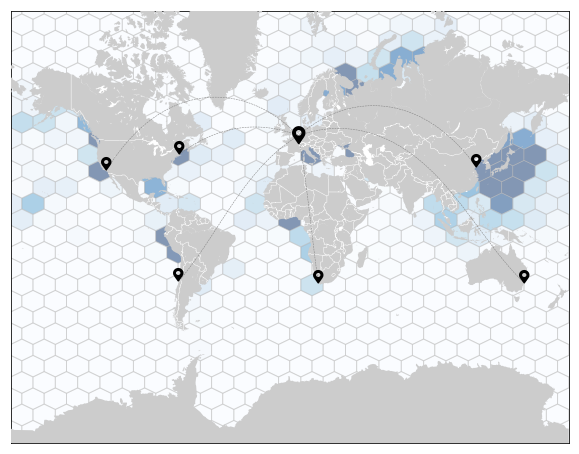

In [7]:
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
m.drawcountries(linewidth=.5, color="w", zorder=4)
#m.drawcoastlines(linewidth=.1, color=".2", zorder=5)
m.fillcontinents(zorder=3, color="#CCCCCC")
#m.drawmeridians(np.arange(-180,180.01,30.), linewidth=0.2, zorder=2)
#m.drawparallels(np.arange(-90,90,20.), linewidth=0.2, zorder=2)

# Add points and lines
plt.text(liegex, liegey, "\uf3c5", fontproperties=fp1, 
             fontsize=18, ha="center", va="center", zorder=7)

for c in coords:
    lonp, latp = m(c[1], c[0])
    plt.text(lonp, latp, "\uf3c5", fontproperties=fp1,
             fontsize=14, ha="center", va="bottom", zorder=7)
    m.drawgreatcircle(liege[0], liege[1], c[1], c[0], zorder=4, 
                      linestyle="--", color=".5", linewidth=.5)

    
plt.hexbin(londataX, latdataY, gridsize=25, reduce_C_function=np.log10,
           cmap=plt.cm.Blues, edgecolors='.75', vmin=20, vmax=2000, zorder=2, alpha=.5)

#plt.savefig(os.path.join(figdir, "poster_map10.jpg"), transparent=True, dpi=300, edgecolor='w',
#            bbox_inches='tight', pad_inches=0)
plt.show()
plt.close()